<a href="https://colab.research.google.com/github/2203A51464/AIML-BATCH-20/blob/main/DAUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import zipfile

pd.set_option('display.max_columns', None)

In [19]:
# Unzip the archive if 'Transjakarta.csv' is inside it
zip_file_path = '/content/archive (4).zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

dfraw = pd.read_csv("dfTransjakarta.csv")
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [20]:
dfraw.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [21]:
# Check duplicated rows
dfraw.duplicated().sum()

np.int64(0)

In [22]:
# Standardize Data Format

dfraw['payCardBank'] = dfraw['payCardBank'].str.upper()
dfraw['payCardBank'] = dfraw['payCardBank'].replace('EMONEY', 'E-MONEY')
dfraw['payCardBank'].unique()

array(['E-MONEY', 'DKI', 'FLAZZ', 'ONLINE', 'BRIZZI', 'BNI'], dtype=object)

In [23]:
# View number of missing values
null_cols = dfraw.columns[dfraw.isnull().any()]
df_null = dfraw[null_cols].isnull().sum().to_frame().reset_index()
df_null.columns = ['Feature', 'Counts']
df_null['Percentage(%)'] = round(df_null['Counts']/len(dfraw) * 100, 3)
df_null

,Feature,Counts,Percentage(%)
0,corridorID,1257,3.317
1,corridorName,1930,5.092
2,tapInStops,1213,3.201
3,tapOutStops,2289,6.040
4,tapOutStopsName,1344,3.546
5,tapOutStopsLat,1344,3.546
6,tapOutStopsLon,1344,3.546
7,stopEndSeq,1344,3.546
8,tapOutTime,1344,3.546
9,payAmount,1007,2.657


In [24]:
dfraw['transID'].nunique()

37900

In [25]:
# Checking null values in corridor ID
dfraw.loc[dfraw['corridorID'].isna() == True,['corridorID','corridorName']]

,corridorID,corridorName
7,NaN,NaN
120,NaN,NaN
240,NaN,NaN
250,NaN,NaN
257,NaN,NaN
...,...,...
37689,NaN,NaN
37727,NaN,NaN
37770,NaN,NaN
37797,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang


In [26]:
# Checking null values in corridor name
dfraw.loc[dfraw['corridorName'].isna() == True,['corridorID','corridorName']]

,corridorID,corridorName
7,NaN,NaN
38,5M,NaN
39,2,NaN
60,T21,NaN
61,12A,NaN
...,...,...
37792,S31,NaN
37815,JAK.56,NaN
37824,S21,NaN
37838,NaN,NaN


In [27]:
# Checking the corridor name with no corridor ID
dfraw.loc[(dfraw['corridorID'].isna() == True)&(dfraw['corridorName'].isna() == False),['corridorID','corridorName']].head()

,corridorID,corridorName
438,NaN,Rusun Waduk Pluit - Penjaringan
895,NaN,Tanah Abang - Kebayoran Lama
1410,NaN,Sunter Boulevard Barat - Penjaringan
1723,NaN,Pulo Gebang - Pulo Gadung 2 via PIK
2423,NaN,Kampung Melayu - Pulo Gebang via BKT


In [28]:
# Checking if there any relation for corridor ID to its corresponding name
dfraw.loc[(dfraw['corridorName']== 'Rusun Waduk Pluit - Penjaringan'),['corridorID','corridorName']].value_counts()

,,count
corridorID,corridorName,
12C,Rusun Waduk Pluit - Penjaringan,131


In [29]:
dfraw.loc[(dfraw['corridorName']== 'Tanah Abang - Kebayoran Lama'),['corridorID','corridorName']].value_counts()

,,count
corridorID,corridorName,
JAK.11,Tanah Abang - Kebayoran Lama,282


In [30]:
dfraw.loc[(dfraw['corridorName']== 'Sunter Boulevard Barat - Penjaringan'),['corridorID','corridorName']].value_counts()

,,count
corridorID,corridorName,
M12,Sunter Boulevard Barat - Penjaringan,95


In [31]:
# Checking the corridor ID and its corridor name
corridorID_name = dfraw.loc[:,['corridorID','corridorName']].dropna().groupby(['corridorID','corridorName']).value_counts().reset_index().drop_duplicates()
corridorID_name

,corridorID,corridorName,count
0,1,Blok M - Kota,230
1,10,Tanjung Priok - PGC 2,97
2,10A,Rusun Marunda - Tanjung Priok,142
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,137
4,10D,Kampung Rambutan - Tanjung Priok,164
...,...,...,...
216,S21,Ciputat - CSW,383
217,S22,Ciputat - Kampung Rambutan,133
218,S31,Bintaro - Fatmawati,146
219,T11,Poris Plawad - Bundaran Senayan,256


In [32]:
# Checking if there are any same values of corridor name
corridorID_name[corridorID_name['corridorName'].duplicated(keep=False)]

,corridorID,corridorName,count
0,1,Blok M - Kota,230
41,2,Pulo Gadung - Monas,279
49,3,Kalideres - Bundaran HI via Veteran,127
62,5,Matraman Baru - Ancol,246
98,9,Pinang Ranti - Pluit,59
198,M1,Blok M - Kota,61
204,M2,Pulo Gadung - Monas,60
205,M3,Kalideres - Bundaran HI via Veteran,204
207,M5,Matraman Baru - Ancol,15
212,M9,Pinang Ranti - Pluit,149


In [33]:
dfclean = dfraw.copy()

In [34]:
# Assign the same value into one

corridorName_to_corridorID = corridorID_name.drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()
dfclean['corridorID'] = dfclean['corridorName'].map(corridorName_to_corridorID)

In [35]:
# Re-checking the values
dfclean.loc[(dfclean['corridorName']== 'Blok M - Kota'),['corridorID','corridorName']].value_counts()

,,count
corridorID,corridorName,
1,Blok M - Kota,291


In [36]:
# Re-checking the values
dfclean.loc[(dfclean['corridorID']== 'M2'),['corridorID','corridorName']].value_counts()

,,count
corridorID,corridorName,


In [37]:
corridor_name_to_id = dfraw.set_index('corridorName')['corridorID'].to_dict()

# Fill NaN values in corridorID based on the corridorName mapping
dfclean['corridorID'] = dfclean.apply(
    lambda row: corridor_name_to_id[row['corridorName']] if pd.isna(row['corridorID']) else row['corridorID'],
    axis=1
)

In [38]:
dfclean['corridorID'].isna().sum()

np.int64(0)

In [79]:
# The goal is to fill missing corridorName using corridorID, and vice-versa,
# based on consistent mappings derived from the data.

# Create a mapping from corridorID to corridorName using the reliable corridorID_name DataFrame
id_to_name_map = corridorID_name.set_index('corridorID')['corridorName'].to_dict()

# Create a mapping from corridorName to corridorID.
# Since corridorName can map to multiple IDs, drop_duplicates picks one (the first encountered).
name_to_id_map = corridorID_name.drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()


# Fill missing 'corridorName' values based on 'corridorID'
# Only attempt to fill where 'corridorName' is NaN and 'corridorID' is not NaN
dfclean.loc[dfclean['corridorName'].isna(), 'corridorName'] = \
    dfclean.loc[dfclean['corridorName'].isna(), 'corridorID'].map(id_to_name_map)

# Fill missing 'corridorID' values based on 'corridorName'
# Only attempt to fill where 'corridorID' is NaN and 'corridorName' is not NaN
dfclean.loc[dfclean['corridorID'].isna(), 'corridorID'] = \
    dfclean.loc[dfclean['corridorID'].isna(), 'corridorName'].map(name_to_id_map)

# After filling, recheck the null values
print(dfclean[['corridorID', 'corridorName']].isnull().sum())

corridorID      0
corridorName    0
dtype: int64


In [41]:
dfclean['corridorName'].isna().sum()

np.int64(0)

In [42]:
tes = dfclean.loc[:,['corridorID','corridorName']].dropna().groupby(['corridorID','corridorName']).value_counts().reset_index().drop_duplicates()
tes

,corridorID,corridorName,count
0,1,Blok M - Kota,291
1,10,Tanjung Priok - PGC 2,97
2,10A,Rusun Marunda - Tanjung Priok,143
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,138
4,10D,Kampung Rambutan - Tanjung Priok,166
...,...,...,...
211,S21,Ciputat - CSW,383
212,S22,Ciputat - Kampung Rambutan,133
213,S31,Bintaro - Fatmawati,146
214,T11,Poris Plawad - Bundaran Senayan,256


In [43]:

# Checking if there are any same values of corridor name
tes[tes['corridorName'].duplicated(keep=False)]

,corridorID,corridorName,count


In [44]:

# Checking null values in tapInStops
dfclean['tapInStops'].isna().sum()

np.int64(1213)

In [45]:
# Checking null values in tapInStops but with value in tapInStopsName
dfclean.loc[dfclean['tapInStops'].isna() == True,['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi
...,...,...
37775,NaN,Sbr. Gg. Langgar Kelapa Dua
37816,NaN,Cipinang Lontar Rusun Polri
37822,NaN,Menara Cardig
37855,NaN,Kel. Balekambang


In [46]:
# Checking the tapInStops and its name-Create dataframe
tapInstops_name = dfclean.loc[:,['tapInStops','tapInStopsName']].dropna().groupby(['tapInStops','tapInStopsName']).value_counts().reset_index().drop_duplicates()
tapInstops_name

,tapInStops,tapInStopsName,count
0,B00001P,18 Office Park,19
1,B00004P,ACC Simatupang,1
2,B00005P,ACE Hardware,6
3,B00008P,Adam Malik 1,1
4,B00017P,Akper Fatmawati Pondok Labu,3
...,...,...,...
2565,P00294,Sawah Besar Arah Selatan,20
2566,P00295,Mangga Besar Arah Utara,23
2567,P00296,Mangga Besar Arah Selatan,3
2568,P00297,BNN LRT,151


In [47]:
# Checking if there are any same values of tapInStopsName
tapInstops_name[tapInstops_name['tapInStopsName'].duplicated(keep=False)]

,tapInStops,tapInStopsName,count
2359,P00052,Dukuh Atas 2,20
2569,P00298,Dukuh Atas 2,1


In [48]:
dfclean[dfclean['tapInStopsName'] == 'Dukuh Atas 2']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
12466,YQZR386J1X76PZ,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-03 08:04:03,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-03 08:51:25,3500.0
13466,MDKU383Q9M74FS,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-04 08:08:41,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-04 10:07:57,3500.0
14466,AQNW655P6W94PI,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,3B,Rusun Flamboyan - Cengkareng,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-05 08:32:25,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-05 09:05:42,3500.0
15466,GRBH066C3K26TE,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-06 08:50:56,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-06 10:36:37,3500.0
16466,PTWX505M7Q47XV,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-07 09:25:53,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-07 09:50:44,3500.0
17466,MHUM533H9N50OV,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-10 08:19:14,NaN,TU Gas,-6.192410,106.90489,14.0,2023-04-10 09:45:06,3500.0
18466,EHIT887E5A67HI,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-11 07:21:18,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-11 09:05:40,3500.0
19466,HVKJ261U1U78AG,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-12 08:41:46,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-12 09:04:10,3500.0
20466,PYOG880C4A77KX,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-13 08:46:28,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-13 10:29:33,3500.0
21466,CEHN700I3L62FS,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-14 08:54:31,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-14 09:34:36,3500.0


In [49]:

# Remove rows where tapInStops is P00298
dfclean = dfclean[dfclean['tapInStops'] != 'P00298']

In [50]:
# Let's check the total unique value since we checked only for nan or corresponding name
print('Number of unique values in cleaned dataframe: ',dfclean['tapInStopsName'].nunique())
print('Number of unique values in selected dataframe: ',tapInstops_name['tapInStopsName'].nunique())

Number of unique values in cleaned dataframe:  2602
Number of unique values in selected dataframe:  2569


In [51]:
# Find unique values in dfclean
unique_tapInStops_dfclean = set(dfclean['tapInStopsName'].unique())

# Find unique values in selected DataFrame
unique_tapInStops_selected = set(tapInstops_name['tapInStopsName'].unique())

# Find the difference
unique_in_dfclean_not_in_selected = unique_tapInStops_dfclean.difference(unique_tapInStops_selected)
print("There are ", len(unique_in_dfclean_not_in_selected), "unique value haven't mentioned in selected dataframe-pairing tapInStops")
unique_in_dfclean_not_in_selected

There are  33 unique value haven't mentioned in selected dataframe-pairing tapInStops


{'Bundaran Alam Sutera 1',
 'Cipinang',
 'Cipinang Lontar Rusun Polri',
 'Fatmawati 1',
 'Galur',
 'Gg. Al Mawaddah Tengah',
 'Graha Sindu Bpk Penabur',
 'Green Lake City',
 'Jln. Pinang 1',
 'Jln. Veteran 2',
 'Kec. Pondok Gede',
 'Kel. Balekambang',
 'Klinik Sasana Husada',
 'Menara Cardig',
 'Nifarro Park',
 'PPKD Jaktim',
 'Ponpes Baitul Quran Al Ikhwan 1',
 'Pusdiklat Pajak Jln. Sakti IV',
 'Rusun Pulo Gebang',
 'Rusun Rorotan 2',
 'Sbr. Barito Park',
 'Sbr. Gg. Langgar Kelapa Dua',
 'Sbr. Jln. R. Anggun',
 'Sbr. Jln. Rawabadung',
 'Sbr. Klinik Yadika Petukangan',
 'Sbr. Koko Semesta',
 'Sbr. Ruko Taman Cemara',
 'Sbr. SMAN 41',
 'Sbr. STIE Rawamangun',
 'Simpang Jln. Kramat Jaya 2',
 'Simpang Otista III Selatan',
 'Sisma Medikal',
 'Term. Muara Angke 2'}

In [52]:
# Let's check those values

dfclean[dfclean['tapInStopsName'].isin(unique_in_dfclean_not_in_selected)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,E-MONEY,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.942360,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
32262,MAVS929E2U67DY,5530470482508325,DKI,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.949750,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32365,GFXI432F3W42KE,342872650777880,E-MONEY,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,DKI,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,DKI,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,BRIZZI,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,DKI,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32821,NXEZ755U4U05XV,4310011077804361,DKI,Baktiono Hartati,F,1954,9H,Blok M - Universitas Indonesia,1.0,NaN,Nifarro Park,-6.263007,106.843320,20,2023-04-15 06:30:46,B02277P,Masjid At Taqwa 1,-6.276957,106.845870,25.0,2023-04-15 07:22:54,3500.0
32852,WQEY067N5P53RZ,371996902605484,E-MONEY,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,-6.128812,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
32861,BHHH076Q0C57JF,6582441579700211,DKI,Dartono Halim,F,1983,JAK.56,Grogol - Srengseng,1.0,NaN,Sbr. Jln. R. Anggun,-6.161055,106.769920,51,2023-04-16 07:59:17,B05704P,Term. Grogol,-6.166565,106.790250,57.0,2023-04-16 09:35:19,0.0


In [53]:

# Let's deep dive

dfclean[dfclean['tapInStopsName'] == 'PPKD Jaktim']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,E-MONEY,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.94236,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0


In [54]:

dfclean[dfclean['tapInStopsName'] == 'Rusun Pulo Gebang']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32262,MAVS929E2U67DY,5530470482508325,DKI,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.94975,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [55]:
# Hanlde missing values in tapInStops based on its corresponding name
mappingTapInStops = dfclean.dropna(subset='tapInStops').drop_duplicates('tapInStopsName')
mappingTapInStops = mappingTapInStops.set_index('tapInStopsName')['tapInStops'].to_dict()

dfclean['tapInStops'] = dfclean['tapInStops'].fillna(dfclean['tapInStopsName'].map(mappingTapInStops))

/tmp/ipython-input-2240229816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['tapInStops'] = dfclean['tapInStops'].fillna(dfclean['tapInStopsName'].map(mappingTapInStops))


In [56]:

dfclean['tapInStops'].isna().sum()

np.int64(34)

In [57]:
dfclean[dfclean['tapInStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,E-MONEY,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.942360,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
32262,MAVS929E2U67DY,5530470482508325,DKI,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.949750,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32365,GFXI432F3W42KE,342872650777880,E-MONEY,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,DKI,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,DKI,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,BRIZZI,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,DKI,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32821,NXEZ755U4U05XV,4310011077804361,DKI,Baktiono Hartati,F,1954,9H,Blok M - Universitas Indonesia,1.0,NaN,Nifarro Park,-6.263007,106.843320,20,2023-04-15 06:30:46,B02277P,Masjid At Taqwa 1,-6.276957,106.845870,25.0,2023-04-15 07:22:54,3500.0
32852,WQEY067N5P53RZ,371996902605484,E-MONEY,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,-6.128812,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
32861,BHHH076Q0C57JF,6582441579700211,DKI,Dartono Halim,F,1983,JAK.56,Grogol - Srengseng,1.0,NaN,Sbr. Jln. R. Anggun,-6.161055,106.769920,51,2023-04-16 07:59:17,B05704P,Term. Grogol,-6.166565,106.790250,57.0,2023-04-16 09:35:19,0.0


In [58]:

# Remove rows with NaN values in 'tapInStops'
dfclean = dfclean.dropna(subset=['tapInStops'])
dfclean['tapInStops'].isna().sum()

np.int64(0)

In [59]:
dfclean['tapOutStops'].isna().sum()

np.int64(2286)

In [60]:
dfclean['tapOutStopsName'].isna().sum()

np.int64(1342)

In [61]:
# Checking null values in tapOutStops
dfclean.loc[dfclean['tapOutStops'].isna() == True,['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
6,NaN,NaN
30,NaN,NaN
70,NaN,NaN
89,NaN,Walikota Jakarta Timur
130,NaN,NaN
...,...,...
37796,NaN,NaN
37799,NaN,NaN
37878,NaN,FX Sudirman
37887,NaN,Pramuka LIA


In [62]:
# Total null values in tapOutStops
print("The total null values in tapOutStops is : ", dfclean['tapOutStops'].isna().sum())
print("The total null values in tapOutStopsName is : ", dfclean['tapOutStopsName'].isna().sum())

# Count the number of rows with tapOutStops that have name
tapout_null_name_notnull = dfclean[dfclean['tapOutStops'].isna() & dfclean['tapOutStopsName'].notna()]
total_tapout_null_name_notnull = tapout_null_name_notnull.shape[0]
print("The total null values in tapOutStops that have tapOutStopsName is : ", total_tapout_null_name_notnull)

# Count the number of rows with tapOutStops that have no name
null_tapout_stops_rows = dfclean[(dfclean['tapOutStops'].isna()) & (dfclean['tapOutStopsName'].isna())]
total_null_tapout_stops_rows = null_tapout_stops_rows.shape[0]
print("The total null values in tapOutStops that have no tapOutStopsName is : ", total_null_tapout_stops_rows)

The total null values in tapOutStops is :  2286
The total null values in tapOutStopsName is :  1342
The total null values in tapOutStops that have tapOutStopsName is :  944
The total null values in tapOutStops that have no tapOutStopsName is :  1342


In [63]:
# Checking the tapOutStops and its name
tapOutstops_name = dfclean.loc[:,['tapOutStops','tapOutStopsName']].dropna().groupby(['tapOutStops','tapOutStopsName']).value_counts().reset_index().drop_duplicates()
tapOutstops_name

,tapOutStops,tapOutStopsName,count
0,B00002P,ABA,2
1,B00003P,Acacia Residence,1
2,B00004P,ACC Simatupang,1
3,B00005P,ACE Hardware,1
4,B00013P,Ahmad Yani Pisangan Baru,1
...,...,...,...
2211,P00293,Sawah Besar Arah Utara,1
2212,P00294,Sawah Besar Arah Selatan,22
2213,P00295,Mangga Besar Arah Utara,8
2214,P00297,BNN LRT,107


In [64]:
dfclean.loc[dfclean['tapOutStopsName']=='ABA',['tapOutStops','tapOutStopsName']].head(5)

,tapOutStops,tapOutStopsName
32867,B00002P,ABA
33896,B00002P,ABA


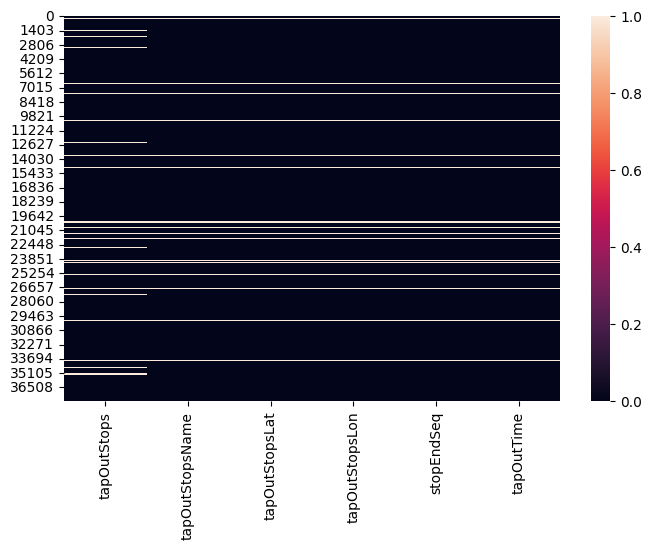

In [65]:
# Plot the missing value in tapOut
plt.figure(figsize=(8, 5))
sns.heatmap(dfclean[['tapOutStops', 'tapOutStopsName',
                     'tapOutStopsLat', 'tapOutStopsLon',
                     'stopEndSeq','tapOutTime' ]].isnull(), cmap='rocket')
plt.show()

In [66]:
pd.set_option('display.max_rows', None)
dfclean[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].isna().sum().reset_index()

,index,0
0,tapOutStops,2286
1,tapOutStopsName,1342
2,tapOutStopsLat,1342
3,tapOutStopsLon,1342
4,stopEndSeq,1342
5,tapOutTime,1342


In [67]:
dfclean.dropna(subset=['tapOutStops', 'tapOutStopsName',
                  'tapOutStopsLat', 'tapOutStopsLon',
                  'stopEndSeq','tapOutTime'],
               inplace=True)

In [68]:

dfclean.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


In [69]:
dfclean['payAmount'].describe()

,payAmount
count,34634.000000
mean,2713.504071
std,4234.672201
min,0.000000
25%,0.000000
50%,3500.000000
75%,3500.000000
max,20000.000000


In [70]:

dfraw['payAmount'].value_counts()

,count
payAmount,
3500.0,18503
0.0,16648
20000.0,1742


In [71]:
unique_amount = dfraw['payAmount'].unique()
s_columns = ['corridorID', 'payAmount']

for amount in unique_amount:
    filtered_df = dfraw[dfraw['payAmount'] == amount][s_columns].head(5)
    print(f"Rows for Category: {amount}")
    print(filtered_df)
    print("\n")

Rows for Category: 3500.0
  corridorID  payAmount
0          5     3500.0
1         6C     3500.0
2        R1A     3500.0
3        11D     3500.0
4         12     3500.0


Rows for Category: 20000.0
    corridorID  payAmount
5           1T    20000.0
8          B14    20000.0
60         T21    20000.0
70          1T    20000.0
117        T21    20000.0


Rows for Category: 0.0
   corridorID  payAmount
6      JAK.18        0.0
7         NaN        0.0
14     JAK.46        0.0
19     JAK.88        0.0
21     JAK.16        0.0


Rows for Category: nan
Empty DataFrame
Columns: [corridorID, payAmount]
Index: []




In [72]:

# Fill NaN of these rows where corridorID is 3B and tapInStops 3500 pay amount

tapin35_3B = ['B00115P', 'B00159P', 'B00257P', 'B01968P', 'B02114P', 'B02155P', 'B02554P', 'B02965P', 'B03318P', 'B03395P',
'B04101P', 'B05423P', 'B05695P', 'P00056', 'P00087',
'P00129', 'P00177', 'P00200', 'P00208', 'P00254']

# Fill NaN values in 'payAmount' with 3500.0 for the specified conditions
dfclean.loc[
    (dfclean['corridorID'] == "3B") &
    (dfclean['tapInStops'].isin(tapin35_3B)) &
    (dfclean['payAmount'].isna()),
    'payAmount'
] = 3500.0

In [73]:
dfclean.loc[(dfclean['corridorID'] == "3B") & (dfclean['tapInStops'].isin(tapin35_3B))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1719,NPVW580E8N31IT,180074627743328,E-MONEY,"Dt. Karsa Nasyidah, M.Kom.",F,1990,3B,Rusun Flamboyan - Cengkareng,0.0,B03395P,Pal Batu 3,-6.225075,106.84149,5,2023-04-05 16:18:54,B01904P,Kel. Benhil,-6.201552,106.80809,21.0,2023-04-05 17:16:12,3500.0
2210,UKZC312W0C24JR,4104888875282062619,BRIZZI,Tgk. Uda Gunarto,F,1996,3B,Rusun Flamboyan - Cengkareng,1.0,B03395P,Pal Batu 3,-6.225075,106.84149,2,2023-04-06 16:09:40,B04907P,Simpang Kawi Raya,-6.209476,106.83322,11.0,2023-04-06 17:52:27,3500.0
3219,IBPZ304Q9R57KS,180074627743328,E-MONEY,"Dt. Karsa Nasyidah, M.Kom.",F,1990,3B,Rusun Flamboyan - Cengkareng,1.0,B00115P,UPT. LLHD 2,-6.225501,106.83489,17,2023-04-10 06:23:13,B05695P,Telkom Tebet,-6.224064,106.85160,21.0,2023-04-10 07:17:52,3500.0
4069,JPFE337Q1I00JC,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,0.0,P00177,PGC 1,-6.262494,106.86635,1,2023-04-11 17:27:49,B06577P,Blok M Jalur 2,-6.243369,106.80188,24.0,2023-04-11 19:03:42,3500.0
4297,HWFZ515R8H30IC,6590854673757012,DKI,Bajragin Najmudin,M,1986,3B,Rusun Flamboyan - Cengkareng,0.0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-12 05:53:35,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-12 06:22:52,3500.0
4669,PRHA534Y1H52BC,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,0.0,P00177,PGC 1,-6.262494,106.86635,1,2023-04-12 17:33:54,B06577P,Blok M Jalur 2,-6.243369,106.80188,24.0,2023-04-12 19:10:34,3500.0
4969,ZIIQ814L4L11VO,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-13 06:03:42,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-13 07:01:03,3500.0
5927,YUDK995Y4U99MM,501828129459,FLAZZ,"Unjani Damanik, S.T.",M,1975,3B,Rusun Flamboyan - Cengkareng,0.0,P00056,Explorer Tanah Abang,-6.184305,106.81158,13,2023-04-14 16:27:34,B02972P,Pospol Jati Bunder,-6.189707,106.81317,15.0,2023-04-14 18:14:19,3500.0
6465,QXNN668U6F02RD,4941966320527194737,BRIZZI,Widya Nuraini,F,1994,3B,Rusun Flamboyan - Cengkareng,0.0,P00208,RS Sumber Waras,-6.166294,106.79675,5,2023-04-17 16:01:05,P00087,Jelambar,-6.166548,106.78651,7.0,2023-04-17 16:55:25,3500.0
6611,GAFM068R4R29BR,347204308990092,E-MONEY,R.M. Labuh Laksmiwati,F,1984,3B,Rusun Flamboyan - Cengkareng,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-18 05:26:43,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-18 06:08:41,3500.0


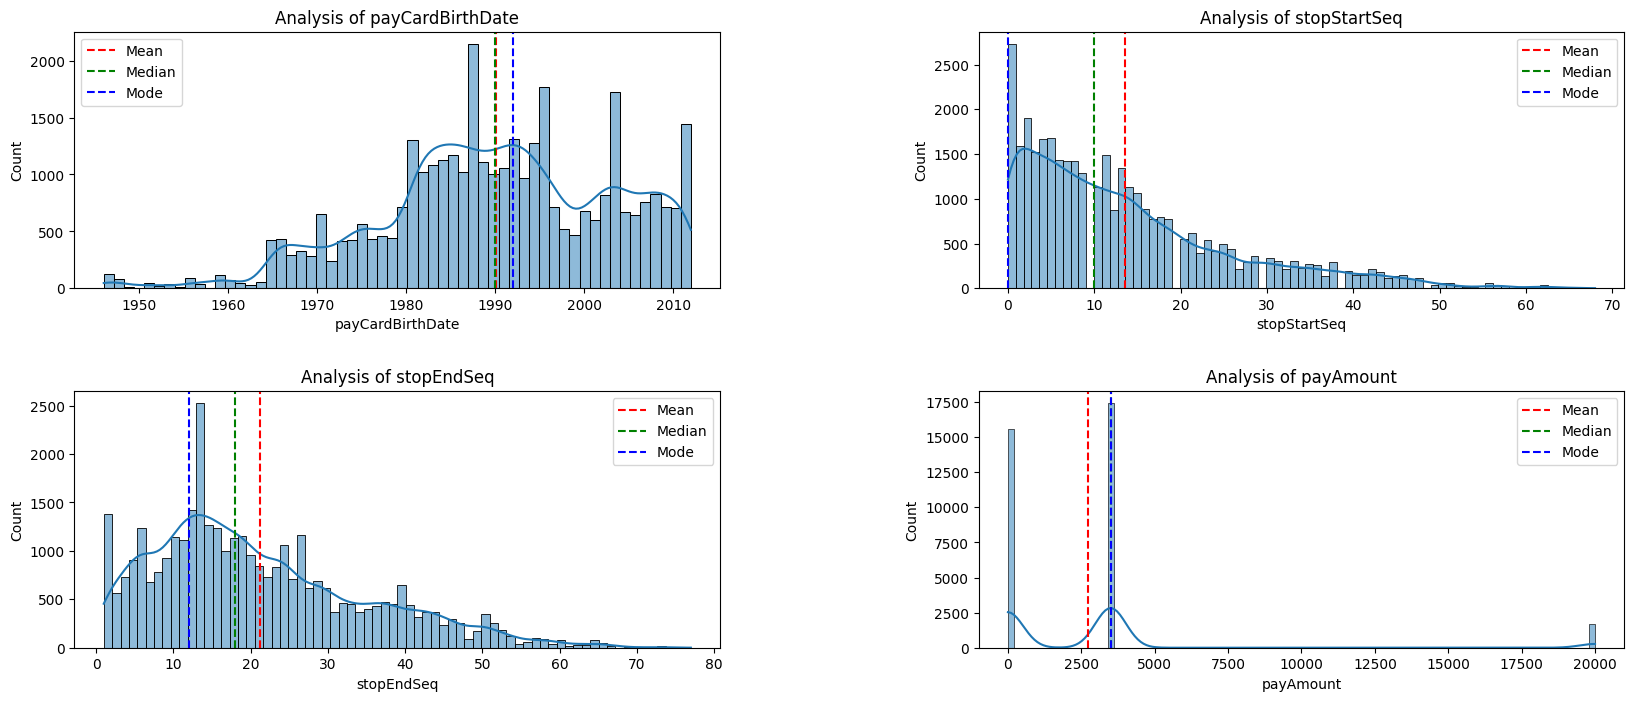

In [74]:
def generate_distribution_plot(train_df, continuous_features):
    # Create copy of dataframe
    data = train_df[continuous_features].copy()

    # Determine the number of subplots based on the number of features
    num_features = len(continuous_features)
    ncols = 2
    nrows = (num_features // ncols) + (num_features % ncols > 0)

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    font = {'size': 12}

    # Plot each feature
    for ax, feature in zip(axes, data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]

        sns.histplot(data[feature], kde=True, ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)

        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()

    # Remove any empty subplots
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

s_num = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount']
generate_distribution_plot(dfclean, s_num)

In [75]:

dfclean[s_num].describe()

,payCardBirthDate,stopStartSeq,stopEndSeq,payAmount
count,35579.000000,35579.000000,35579.000000,34665.000000
mean,1990.122235,13.567160,21.216392,2714.207414
std,13.046139,12.230395,13.800923,4232.843532
min,1946.000000,0.000000,1.000000,0.000000
25%,1982.000000,4.000000,11.000000,0.000000
50%,1990.000000,10.000000,18.000000,3500.000000
75%,2001.000000,19.000000,29.000000,3500.000000
max,2012.000000,68.000000,77.000000,20000.000000


In [76]:
# Feature extraction for payBirthDate column

def age_group (age):
    if age >= 1946 and age <= 1964:
        return 'Baby Boomer'
    elif age >= 1965 and age <= 1980:
        return 'Gen X'
    elif age >= 1981 and age <= 1996:
        return 'Millenials'
    elif age >= 1997 and age <=2012:
        return 'Gen Z'

dfclean['Age_Group'] = dfclean['payCardBirthDate'].apply(age_group)

In [77]:

# Age Distribution Count
agegroup = dfclean['Age_Group'].value_counts().reset_index()
agegroup

,Age_Group,count
0,Millenials,17378
1,Gen Z,11291
2,Gen X,6126
3,Baby Boomer,784


/tmp/ipython-input-2849918521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group',


Text(0.5, 1.0, 'Ratio of Group of Age')

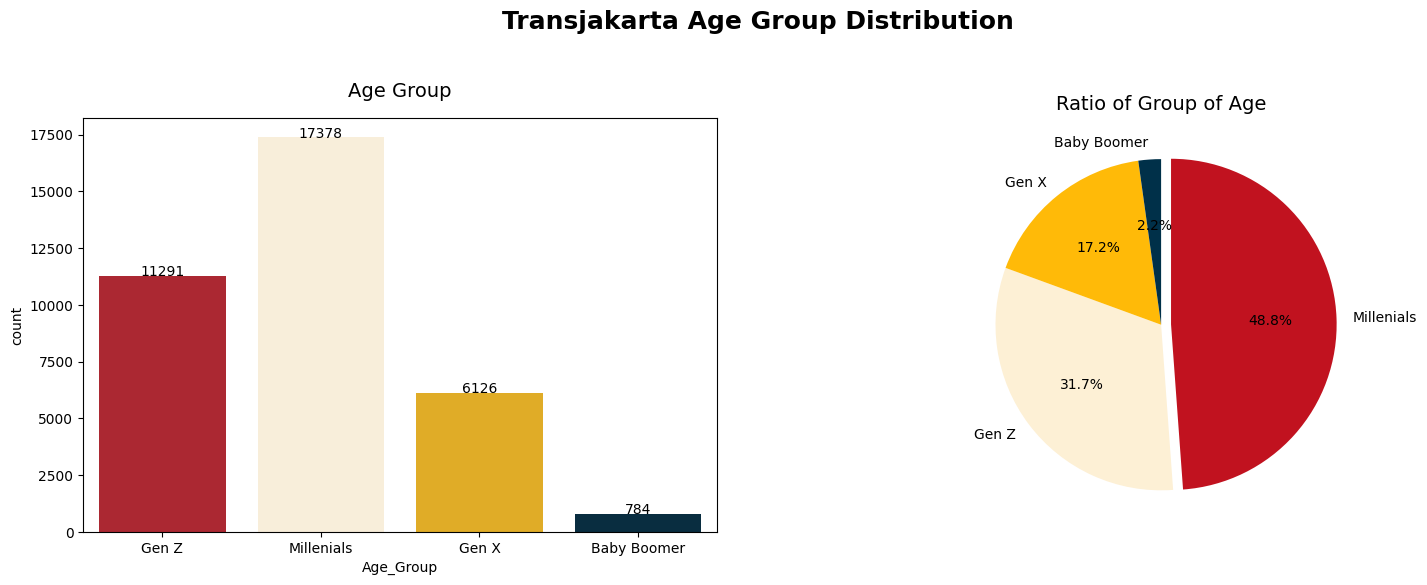

In [80]:
figure, axes = plt.subplots(1, 2,  figsize=(18,6))
figure.suptitle("Transjakarta Age Group Distribution", size=18, fontweight='bold')
figure.subplots_adjust(top=0.8)  # Adjust this value as needed

sns.countplot(x='Age_Group',
            data=dfclean,
            palette=['#C1121F', '#FDF0D5', '#FFBA08', '#003049'],
            ax=axes[0])
axes[0].set_title('Age Group', size=14, pad=15)

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.0f}', ha="center")

axes[1].pie(agegroup['count'], labels=agegroup['Age_Group'],
        startangle=90, autopct='%.1f%%', counterclock=False,
        colors=['#C1121F', '#FDF0D5', '#FFBA08', '#003049'],
        explode = [0.06, 0, 0, 0],
        )
axes[1].set_title("Ratio of Group of Age", size=14)

In [81]:
# Add 'Vehicle Type' column
def vehicle (payamount):
    if payamount == 0:
        return 'Jak Lingko'
    elif payamount == 3500:
        return 'Trans Jakarta'
    else:
        return 'Royal Trans'

dfclean['Vehicle_Type'] = dfclean['payAmount'].apply(vehicle)

Text(0.5, 1.0, 'Ratio of Vehicle Type')

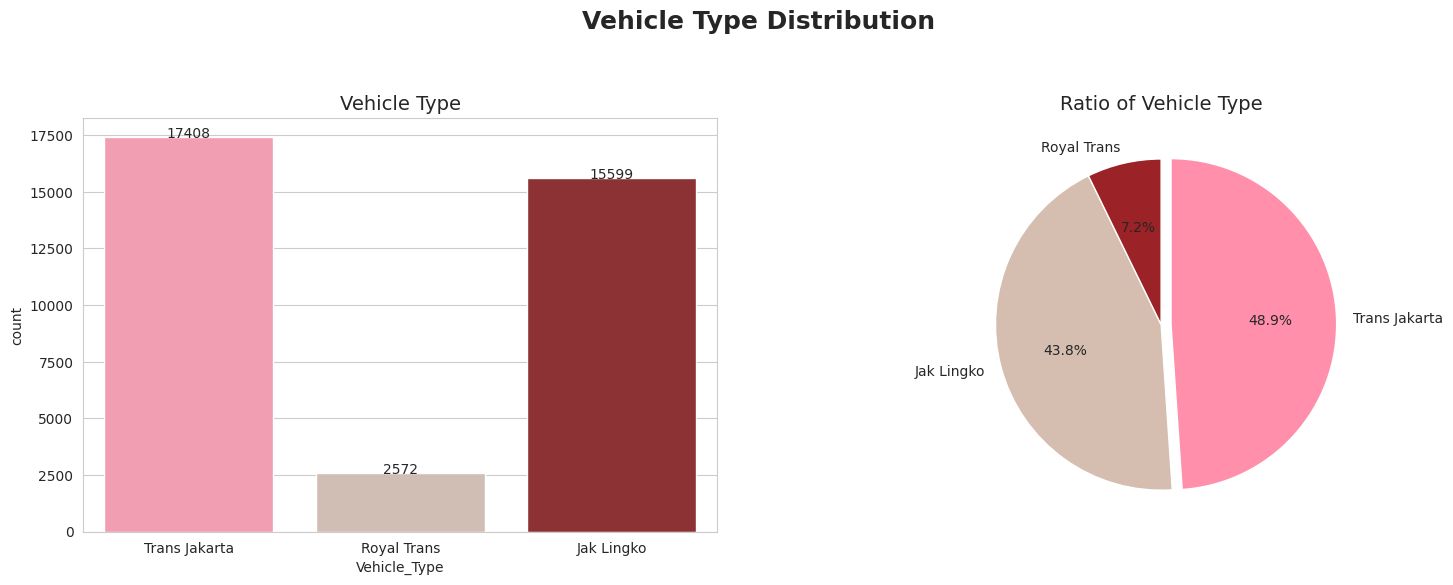

In [88]:
figure, axes = plt.subplots(1, 2,  figsize=(18,6))
figure.suptitle("Vehicle Type Distribution", size=18, fontweight='bold')
figure.subplots_adjust(top=0.8)
sns.countplot(x='Vehicle_Type',
            data=dfclean,
            palette=['#FF8FAB', '#D5BDAF', '#9B2226'],
            ax=axes[0],
            hue='Vehicle_Type',
            legend=False)
axes[0].set_title('Vehicle Type', size=14)

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.0f}', ha="center")

# Create vehiclegroup DataFrame
vehiclegroup = dfclean['Vehicle_Type'].value_counts().reset_index()
vehiclegroup.columns = ['Vehicle_Type', 'Total'] # Renaming columns for clarity

axes[1].pie(vehiclegroup['Total'], labels=vehiclegroup['Vehicle_Type'],
        startangle=90, autopct='%.1f%%', counterclock=False,
        colors=['#FF8FAB', '#D5BDAF', '#9B2226'],
        explode = [0.06, 0, 0],
        )
axes[1].set_title("Ratio of Vehicle Type", size=14)

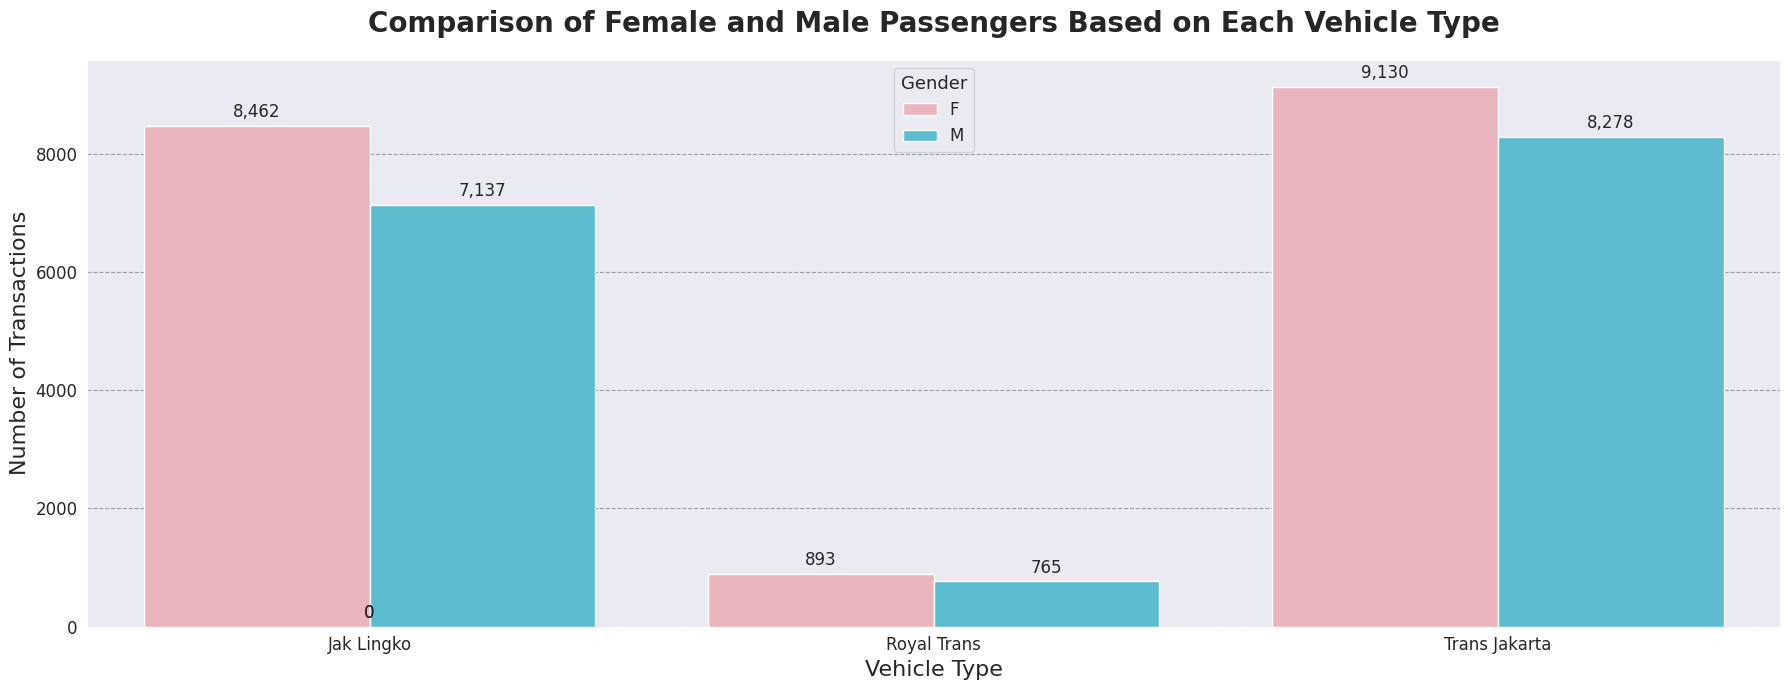

In [96]:
gender_vehicle_trend = dfclean.groupby(['payCardSex', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Count"})

# Plotting
plt.figure(figsize=(18, 7))
bar_plot = sns.barplot(x='Vehicle_Type', y='Count', hue='payCardSex', data=gender_vehicle_trend, palette=['#f4acb7', '#48cae4'])

# Adding titles and labels
plt.title('Comparison of Female and Male Passengers Based on Each Vehicle Type', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Vehicle Type', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize='13')

# Adding annotations
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), ','),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points',
                      fontsize=12)

# Customize grid
bar_plot.yaxis.grid(True, color='gray', linestyle='--', alpha=0.7)
bar_plot.xaxis.grid(False)

plt.tight_layout()
plt.show()

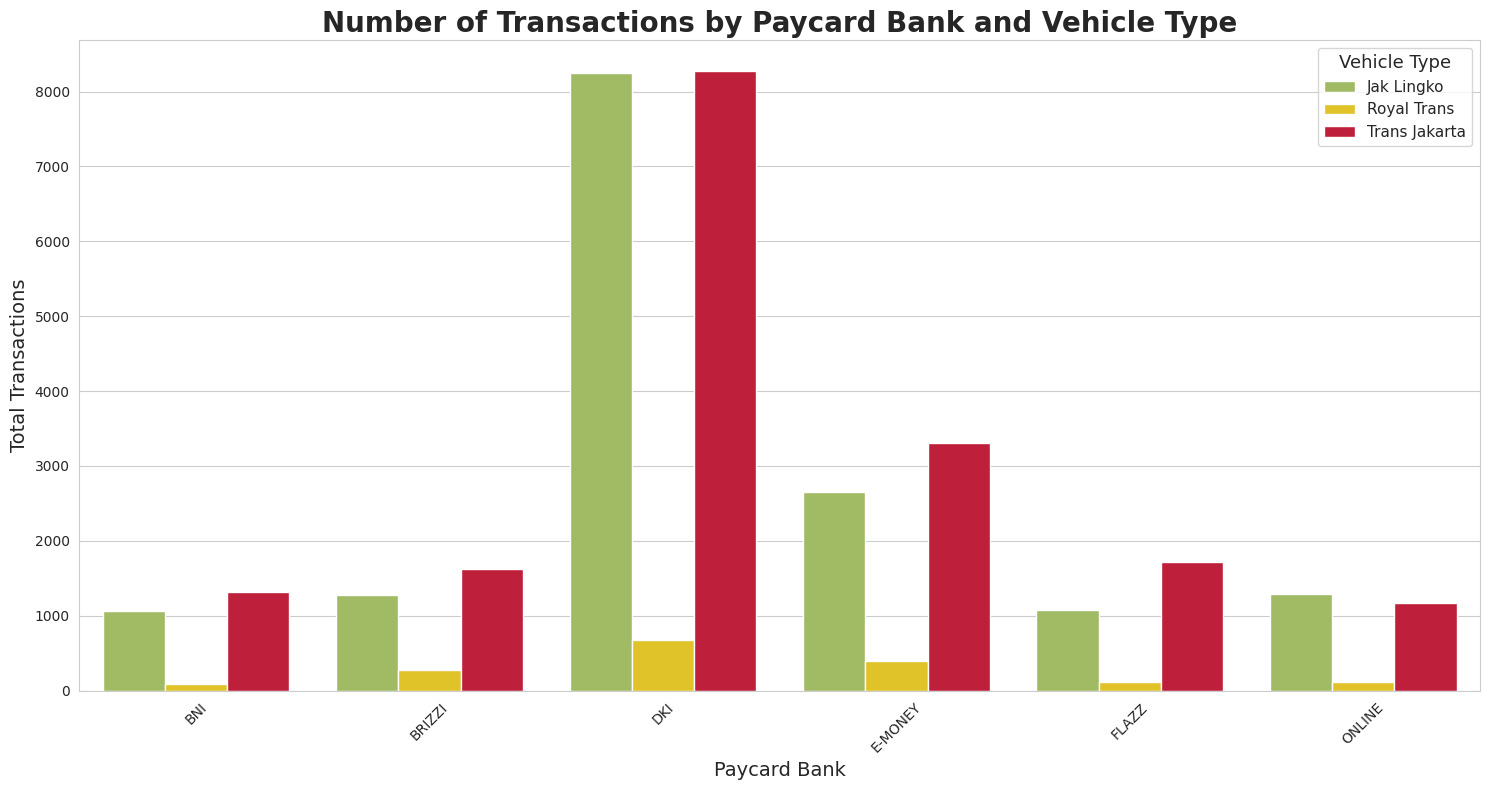

In [97]:
paycard_vehicle_data = dfclean.groupby(['payCardBank', 'Vehicle_Type'])['transID'].count().reset_index()
paycard_vehicle_data = paycard_vehicle_data.rename(columns={'transID': 'Total Transactions'})

# Plotting
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')
sns.barplot(data=paycard_vehicle_data, x='payCardBank', y='Total Transactions', hue='Vehicle_Type', palette=['#a7c957', '#ffd60a', '#d90429'])

# Add title and labels
plt.title('Number of Transactions by Paycard Bank and Vehicle Type', fontsize=20, fontweight='bold')
plt.xlabel('Paycard Bank', fontsize=14)
plt.ylabel('Total Transactions', fontsize=14)
plt.legend(title='Vehicle Type', title_fontsize='13', fontsize='11')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

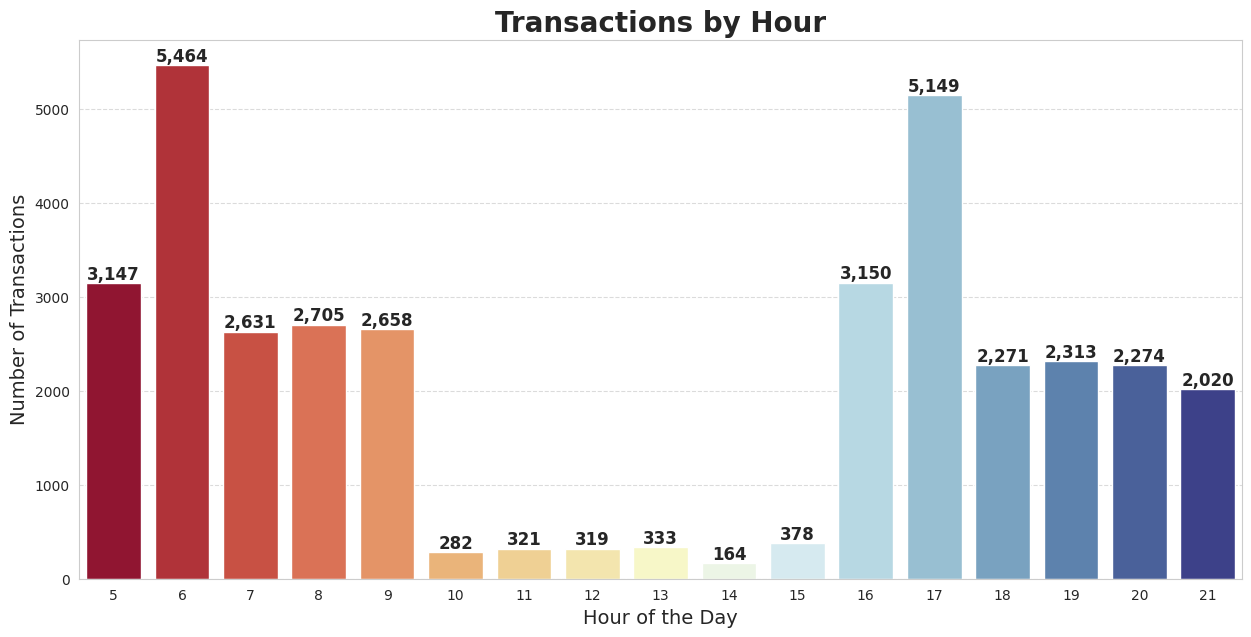

In [91]:
# Convert 'tapInTime' to datetime objects to extract the hour
dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'])
dfclean['hour'] = dfclean['tapInTime'].dt.hour

# Peak hours analysis
peak_hours = dfclean.groupby('hour').size().reset_index(name='Number of Transactions')

sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))

# Plotting
bar_plot = sns.barplot(x='hour', y='Number of Transactions', data=peak_hours, palette='RdYlBu', hue='hour', legend=False)
bar_plot.set_title('Transactions by Hour', fontsize=20, fontweight='bold')
bar_plot.set_xlabel('Hour of the Day', fontsize=14)
bar_plot.set_ylabel('Number of Transactions', fontsize=14)

# Annotation
for container in bar_plot.containers:
    bar_plot.bar_label(container, labels=[f'{int(height):,}' for height in container.datavalues],
                       label_type='edge', fontsize=12, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

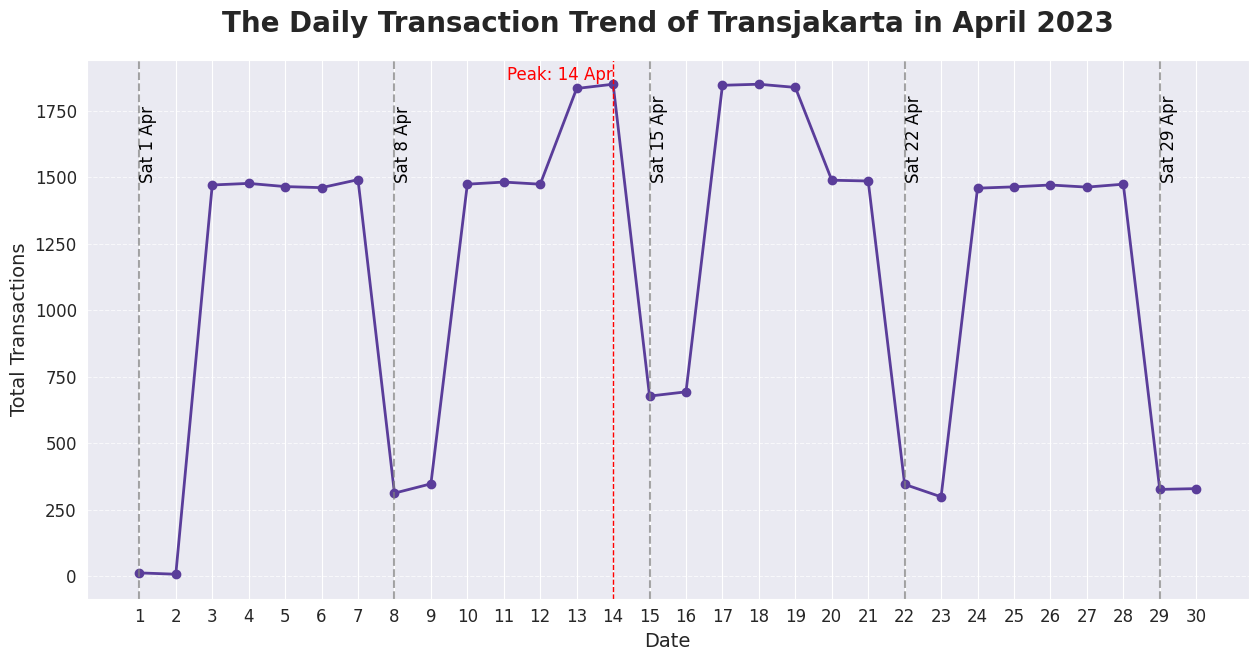

In [93]:
# Extract day from 'tapInTime' for daily trend analysis
dfclean['day'] = dfclean['tapInTime'].dt.day
trend = dfclean.copy()

# Group by date and count transactions
daily_trend = trend.groupby('day')['transID'].count()

# Set plot style
sns.set_style('darkgrid')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(daily_trend, color='#5a3d9a', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(ticks=np.arange(1, 31), fontsize=12)
plt.yticks(fontsize=12)
plt.title("The Daily Transaction Trend of Transjakarta in April 2023", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Transactions", fontsize=14)

# Annotate specific days (Saturdays in April 2023)
saturdays = [1, 8, 15, 22, 29]
annotations = ['Sat 1 Apr', 'Sat 8 Apr', 'Sat 15 Apr', 'Sat 22 Apr', 'Sat 29 Apr']
for day, annotation in zip(saturdays, annotations):
    plt.axvline(day, color='gray', linestyle='--', alpha=0.7)
    plt.text(day, daily_trend.max() * 0.80, annotation, rotation=90, color='black',
             verticalalignment='bottom', fontsize=12)


# Highlight the peak day
peak_day = daily_trend.idxmax()
peak_value = daily_trend.max()
plt.axvline(peak_day, color='red', linestyle='--', linewidth=1)
plt.text(peak_day, peak_value, f'Peak: {peak_day} Apr', color='red',
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [92]:
# Remove rows with NaN values in 'payAmount'
dfclean.dropna(subset=['payAmount'], inplace=True)

# Re-check the number of missing values in 'payAmount'
print(dfclean['payAmount'].isna().sum())

# Re-create 'Vehicle_Type' column after dropping rows with NaN payAmount
def vehicle (payamount):
    if payamount == 0:
        return 'Jak Lingko'
    elif payamount == 3500:
        return 'Trans Jakarta'
    else:
        return 'Royal Trans'

dfclean['Vehicle_Type'] = dfclean['payAmount'].apply(vehicle)

# Display summary of cleaned DataFrame
print("\n--- Cleaned DataFrame Info ---")
dfclean.info()

0

--- Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 34665 entries, 0 to 37899
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           34665 non-null  object        
 1   payCardID         34665 non-null  int64         
 2   payCardBank       34665 non-null  object        
 3   payCardName       34665 non-null  object        
 4   payCardSex        34665 non-null  object        
 5   payCardBirthDate  34665 non-null  int64         
 6   corridorID        34665 non-null  object        
 7   corridorName      34665 non-null  object        
 8   direction         34665 non-null  float64       
 9   tapInStops        34665 non-null  object        
 10  tapInStopsName    34665 non-null  object        
 11  tapInStopsLat     34665 non-null  float64       
 12  tapInStopsLon     34665 non-null  float64       
 13  stopStartSeq      34665 non-null  int64        

In [94]:
dfclean['corridorName'].nunique()

211

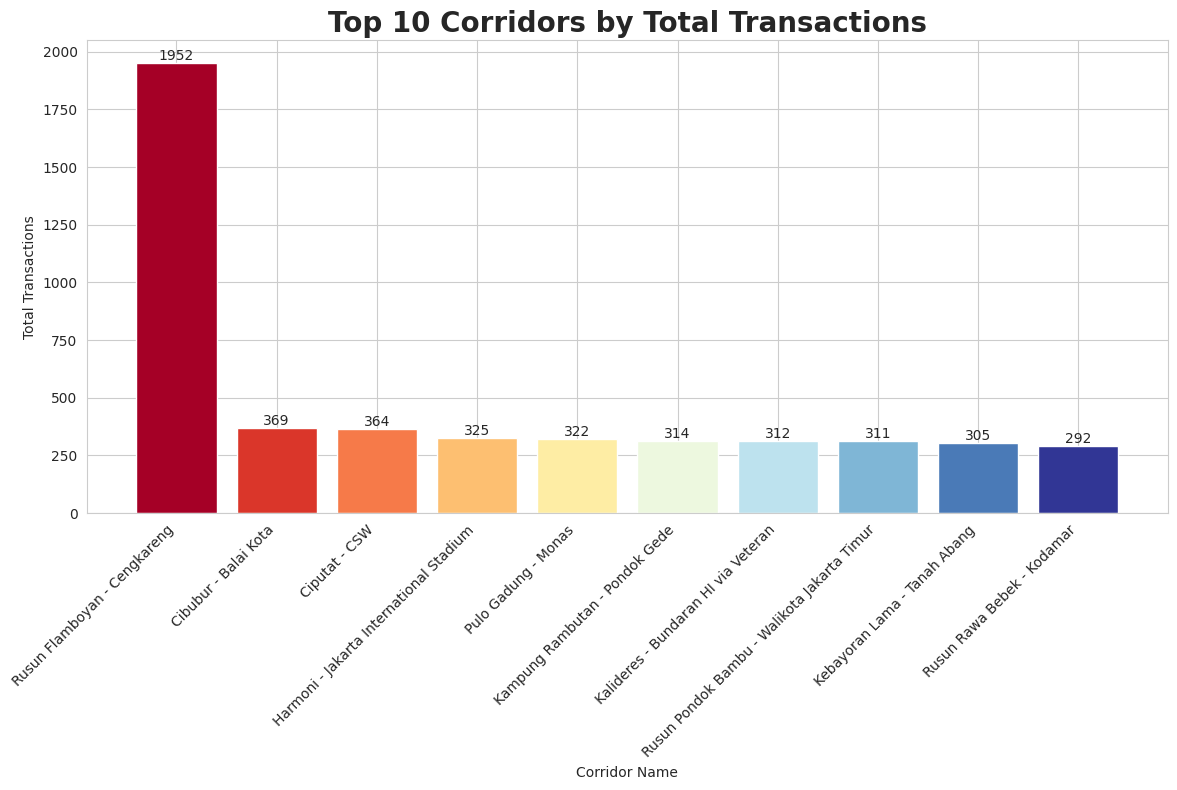

In [98]:
# Calculate total transactions for each corridor
active_corridor = dfclean.groupby('corridorName')['transID'].count().reset_index()
active_corridor = active_corridor.rename(columns={'transID': 'Total_Trx'})

# Plotting
corridor_totals = active_corridor.groupby('corridorName')['Total_Trx'].sum().reset_index()
corridor_totals_sorted = corridor_totals.sort_values(by='Total_Trx', ascending=False)
top_10_corridors = corridor_totals_sorted.head(10)

plt.figure(figsize=(12, 8))

# Custom color palette for bars
colors = cm.RdYlBu(np.linspace(0, 1, len(top_10_corridors['corridorName'])))
bars = plt.bar(top_10_corridors['corridorName'], top_10_corridors['Total_Trx'], color=colors)

# Adding labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Corridor Name')
plt.ylabel('Total Transactions')
plt.title('Top 10 Corridors by Total Transactions', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

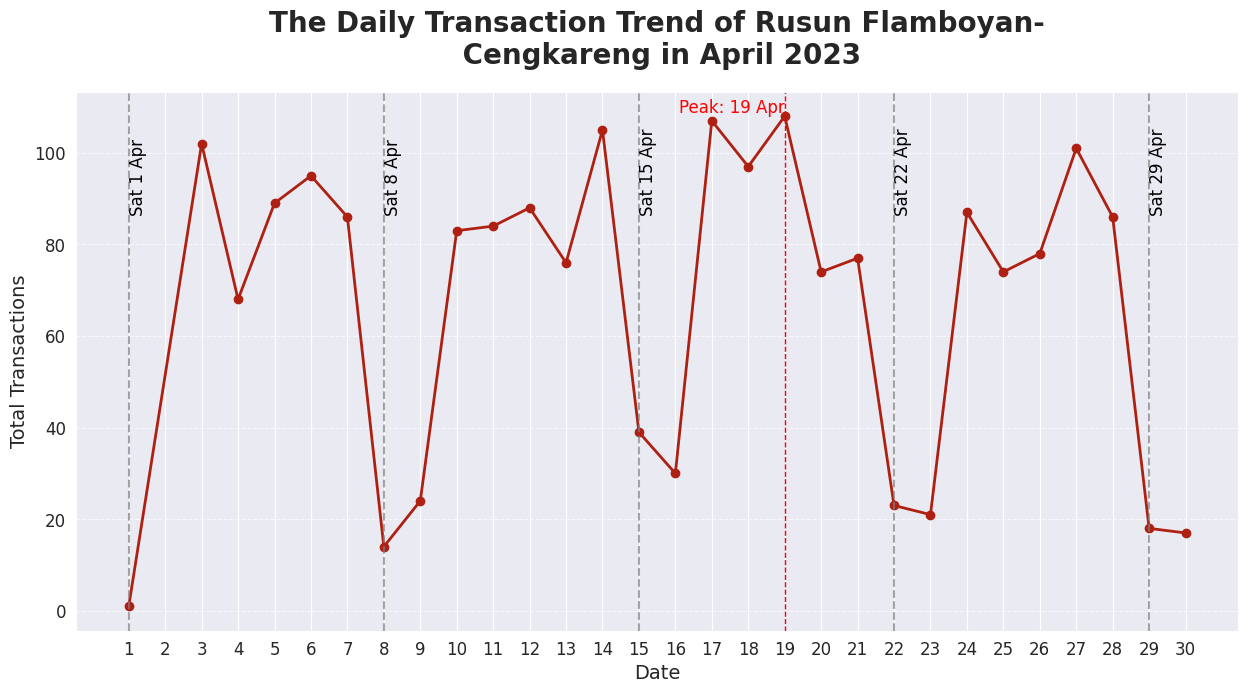

In [99]:
specific_corridor = 'Rusun Flamboyan - Cengkareng'
flamboyan_trend = trend[trend['corridorName'] == specific_corridor]

# Group by date and count transactions for the specific corridor
daily_trend = flamboyan_trend.groupby('day')['transID'].count()

# Set plot style
sns.set_style('darkgrid')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(daily_trend, color='#ae2012', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(ticks=np.arange(1, 31), fontsize=12)
plt.yticks(fontsize=12)
plt.title("The Daily Transaction Trend of Rusun Flamboyan-\n Cengkareng in April 2023", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Transactions", fontsize=14)

# Annotate specific days (Saturdays in April 2023)
saturdays = [1, 8, 15, 22, 29]
annotations = ['Sat 1 Apr', 'Sat 8 Apr', 'Sat 15 Apr', 'Sat 22 Apr', 'Sat 29 Apr']
for day, annotation in zip(saturdays, annotations):
    plt.axvline(day, color='gray', linestyle='--', alpha=0.7)
    plt.text(day, daily_trend.max() * 0.80, annotation, rotation=90, color='black',
             verticalalignment='bottom', fontsize=12)


# Highlight the peak day
peak_day = daily_trend.idxmax()
peak_value = daily_trend.max()
plt.axvline(peak_day, color='red', linestyle='--', linewidth=1)
plt.text(peak_day, peak_value, f'Peak: {peak_day} Apr', color='red',
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [100]:
peak_days_flamboyan = [3, 14, 17, 19, 27]
peak_day_flamboyan = flamboyan_trend[flamboyan_trend['day'].isin(peak_days_flamboyan)]

# Group by day and count transactions for the specific corridor on peak days
peak_trx_flamboyan = peak_day_flamboyan.groupby('day')['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})
peak_trx_flamboyan

,day,Total Transaction
0,3,102
1,14,105
2,17,107
3,19,108
4,27,101


In [101]:

peak_days_flamboyan = [3, 14, 17, 19, 27]
peak_day_flamboyan = flamboyan_trend[flamboyan_trend['day'].isin(peak_days_flamboyan)]

# Group by day and count transactions for the specific corridor on peak days
peak_trx_vhc_flamboyan = peak_day_flamboyan.groupby(['day', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})
peak_trx_vhc_flamboyan.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
day,3,3,3,14,14,14,17,17,17,19,19,19,27,27,27
Vehicle_Type,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta
Total Transaction,48,6,48,53,4,48,50,6,51,61,3,44,52,5,44


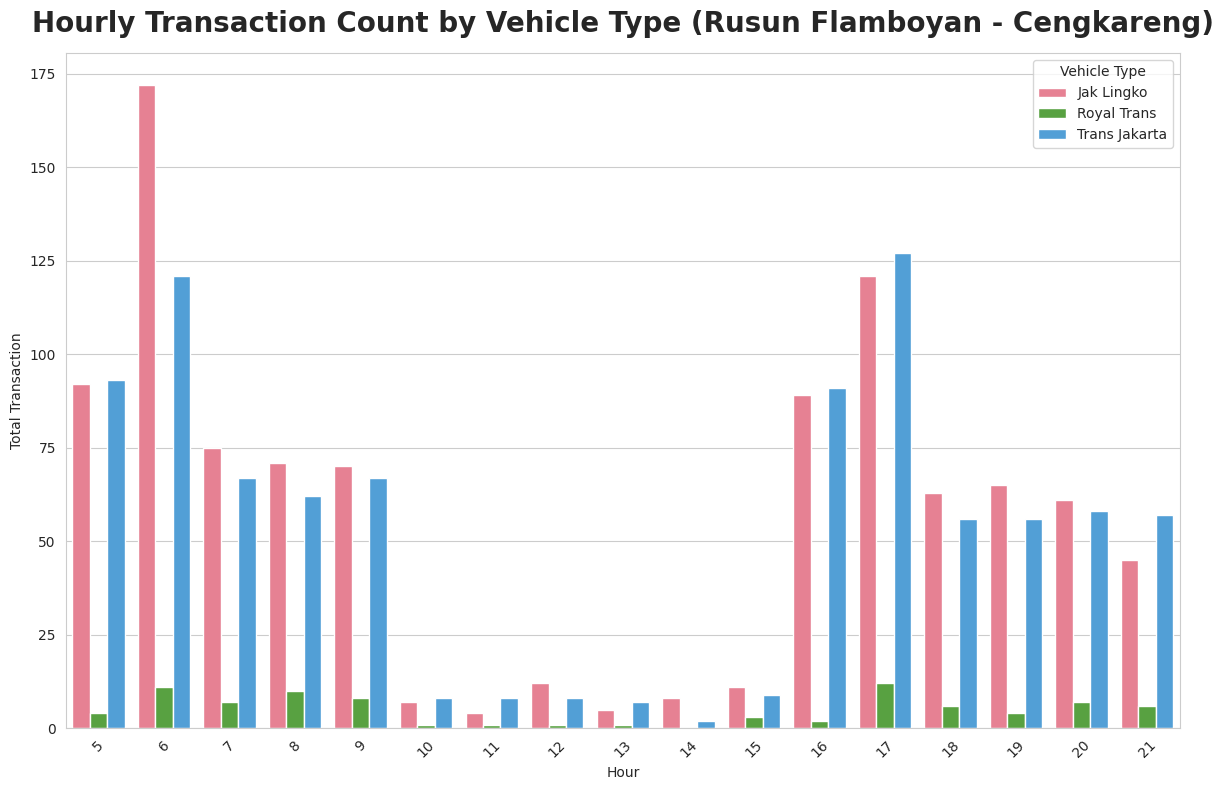

In [103]:
# Calculate hourly transaction count by vehicle type for the specific corridor
total_vehicle_type_hourly = flamboyan_trend.groupby(['hour', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})

# Plotting
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='hour', y='Total Transaction', hue='Vehicle_Type', data=total_vehicle_type_hourly, palette=palette)
plt.title('Hourly Transaction Count by Vehicle Type (Rusun Flamboyan - Cengkareng)', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Hour')
plt.ylabel('Total Transaction')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
# Group by hour and vehicle type, then count total transactions
total_vehicle_type_hourly = peak_day_flamboyan.groupby(['hour', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})

# Define vehicle capacities
vehicle_capacities = {
    'Jak Lingko': 11,
    'Trans Jakarta': 30,
    'Royal Trans': 43
}

# Add the 'Vehicle Needed' column
total_vehicle_type_hourly['Vehicle Needed'] = total_vehicle_type_hourly.apply(
    lambda row: int(np.ceil(row['Total Transaction'] / vehicle_capacities.get(row['Vehicle_Type'], 1))), axis=1)

total_vehicle_type_hourly

,hour,Vehicle_Type,Total Transaction,Vehicle Needed
0,5,Jak Lingko,17,2
1,5,Royal Trans,2,1
2,5,Trans Jakarta,24,1
3,6,Jak Lingko,53,5
4,6,Royal Trans,6,1
5,6,Trans Jakarta,33,2
6,7,Jak Lingko,23,3
7,7,Royal Trans,2,1
8,7,Trans Jakarta,14,1
9,8,Jak Lingko,18,2


/tmp/ipython-input-2460769230.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x='hour', y='Vehicle Needed', hue='Vehicle_Type', data=total_vehicle_type_hourly, palette=palette)


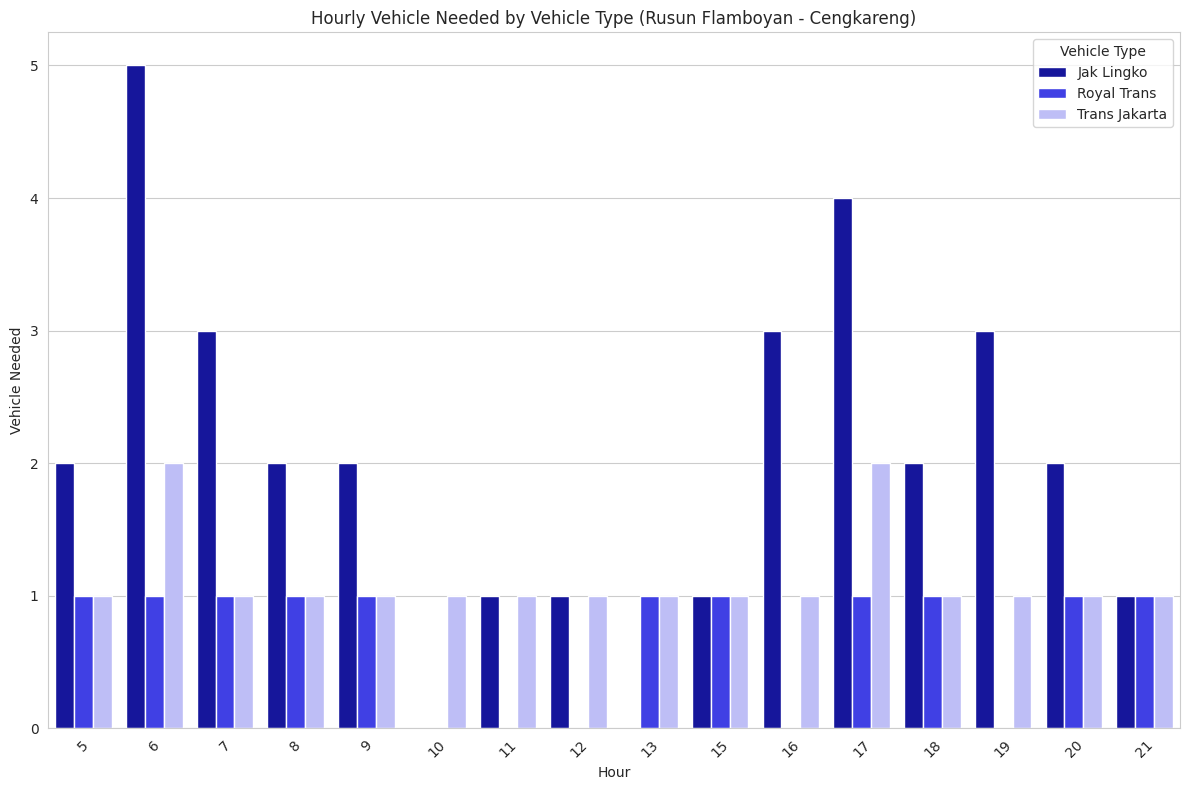

In [105]:
plt.figure(figsize=(12, 8))
palette = sns.color_palette("seismic")

# Plot
sns.barplot(x='hour', y='Vehicle Needed', hue='Vehicle_Type', data=total_vehicle_type_hourly, palette=palette)
plt.title('Hourly Vehicle Needed by Vehicle Type (Rusun Flamboyan - Cengkareng)')
plt.xlabel('Hour')
plt.ylabel('Vehicle Needed')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()